In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./cwru_train.csv',header=None)
df_test = pd.read_csv('./cwru_test.csv',header=None)
df = pd.concat([df_train, df_test], axis=0)
df.shape

(28000, 785)

In [3]:
all_data = df.to_numpy()
all_data.shape

(28000, 785)

In [4]:
X = all_data[:, 1:]
y = all_data[:, 0]
X.shape, y.shape

((28000, 784), (28000,))

In [5]:
print(y[0])

8.0


<BarContainer object of 10 artists>

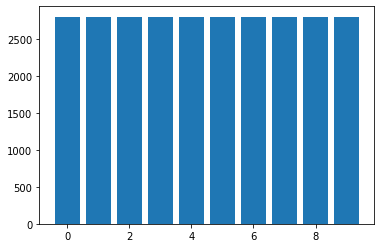

In [6]:
data_by_label = {}
for i in set(y):
    data_by_label[i] = []
for i, item in enumerate(y):
    data_by_label[item].append(X[i].tolist())

plt.bar(x=list(data_by_label.keys()), height=[len(data_by_label[key]) for key in data_by_label.keys()])

In [7]:
NUM_USER = 50
NUM_LABEL_PER_USER = 2
NUM_LABEL = 10
INTERVAL = int(NUM_USER*NUM_LABEL_PER_USER/NUM_LABEL)
INTERVAL

10

In [8]:
np.random.seed(1)
range_in_label = []

for i in range(NUM_LABEL):
    tmp = []
    total = len(data_by_label[i])
    for j in range(INTERVAL-1):
        val = np.random.randint(total//(INTERVAL + 1), total//2)
        tmp.append(val)
        total -= val
    tmp.append(total)
    range_in_label.append(tmp)

range_in_label

[[1315, 370, 497, 128, 181, 103, 23, 80, 25, 78],
 [383, 1191, 182, 331, 345, 53, 129, 34, 33, 119],
 [1161, 401, 602, 213, 195, 34, 67, 15, 33, 79],
 [1255, 643, 434, 128, 167, 22, 74, 29, 5, 43],
 [570, 411, 429, 557, 196, 87, 121, 170, 93, 166],
 [769, 976, 138, 159, 94, 169, 160, 71, 106, 158],
 [269, 426, 216, 538, 593, 350, 190, 41, 25, 152],
 [1253, 266, 395, 436, 195, 60, 74, 30, 16, 75],
 [1005, 250, 383, 453, 138, 241, 76, 55, 41, 158],
 [949, 489, 492, 412, 44, 165, 99, 19, 63, 68]]

In [9]:
flag = True
for i in range_in_label[1]:
    if flag:
        flag=False
        continue
    for j in range_in_label[2]:
        print(f"{i} + {j} = {i+j}")
    print()

1191 + 1161 = 2352
1191 + 401 = 1592
1191 + 602 = 1793
1191 + 213 = 1404
1191 + 195 = 1386
1191 + 34 = 1225
1191 + 67 = 1258
1191 + 15 = 1206
1191 + 33 = 1224
1191 + 79 = 1270

182 + 1161 = 1343
182 + 401 = 583
182 + 602 = 784
182 + 213 = 395
182 + 195 = 377
182 + 34 = 216
182 + 67 = 249
182 + 15 = 197
182 + 33 = 215
182 + 79 = 261

331 + 1161 = 1492
331 + 401 = 732
331 + 602 = 933
331 + 213 = 544
331 + 195 = 526
331 + 34 = 365
331 + 67 = 398
331 + 15 = 346
331 + 33 = 364
331 + 79 = 410

345 + 1161 = 1506
345 + 401 = 746
345 + 602 = 947
345 + 213 = 558
345 + 195 = 540
345 + 34 = 379
345 + 67 = 412
345 + 15 = 360
345 + 33 = 378
345 + 79 = 424

53 + 1161 = 1214
53 + 401 = 454
53 + 602 = 655
53 + 213 = 266
53 + 195 = 248
53 + 34 = 87
53 + 67 = 120
53 + 15 = 68
53 + 33 = 86
53 + 79 = 132

129 + 1161 = 1290
129 + 401 = 530
129 + 602 = 731
129 + 213 = 342
129 + 195 = 324
129 + 34 = 163
129 + 67 = 196
129 + 15 = 144
129 + 33 = 162
129 + 79 = 208

34 + 1161 = 1195
34 + 401 = 435
34 + 602 = 636

In [10]:
np.random.seed(10)
all_user = {}
flag1 = [0]*NUM_LABEL
flag2 = [0]*NUM_LABEL
available_label = set(list(range(NUM_LABEL)))

for i in range(NUM_USER):
    print(i)
    all_user[str(i)] = {}
    a = list(available_label)
    print('a',a)
    labels = np.random.choice(a, size=(NUM_LABEL_PER_USER,), replace=False)
    for label in labels:
        tmp = flag1[label]
        tmp_ = tmp + range_in_label[label][flag2[label]]
        all_user[str(i)][int(label)] = data_by_label[label][tmp:tmp_]
        flag1[label] = tmp_
        flag2[label] += 1
        if flag2[label] == INTERVAL:
            available_label.remove(label)

0
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
3
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
4
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
6
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
7
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
8
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
9
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
11
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
12
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
13
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
14
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
15
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
16
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
17
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
18
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
19
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
20
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
21
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
22
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
23
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
24
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
25
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
26
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
27
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
28

0 2
8: 1005 2: 1161 

1 2
5: 769 3: 1255 

2 2
1: 383 6: 269 

3 2
0: 1315 7: 1253 

4 2
2: 401 0: 370 

5 2
1: 1191 4: 570 

6 2
5: 976 4: 411 

7 2
7: 266 3: 643 

8 2
5: 138 6: 426 

9 2
1: 182 8: 250 

10 2
5: 159 9: 949 

11 2
3: 434 8: 383 

12 2
8: 453 1: 331 

13 2
9: 489 4: 429 

14 2
8: 138 3: 128 

15 2
6: 216 2: 602 

16 2
1: 345 8: 241 

17 2
9: 492 4: 557 

18 2
2: 213 4: 196 

19 2
2: 195 6: 538 

20 2
2: 34 3: 167 

21 2
4: 87 2: 67 

22 2
3: 22 7: 395 

23 2
4: 121 5: 94 

24 2
3: 74 1: 53 

25 2
4: 170 1: 129 

26 2
7: 436 8: 76 

27 2
8: 55 7: 195 

28 2
7: 60 8: 41 

29 2
0: 497 4: 93 

30 2
6: 593 5: 169 

31 2
3: 29 1: 34 

32 2
4: 166 9: 412 

33 2
5: 160 7: 74 

34 2
3: 5 7: 30 

35 2
2: 15 1: 33 

36 2
8: 158 7: 16 

37 2
5: 71 1: 119 

38 2
7: 75 6: 350 

39 2
9: 44 5: 106 

40 2
5: 158 2: 33 

41 2
3: 43 2: 79 

42 2
0: 128 9: 165 

43 2
0: 181 6: 190 

44 2
0: 103 6: 41 

45 2
6: 25 9: 99 

46 2
9: 19 0: 23 

47 2
6: 152 0: 80 

48 2
0: 25 9: 63 

49 2
0: 78

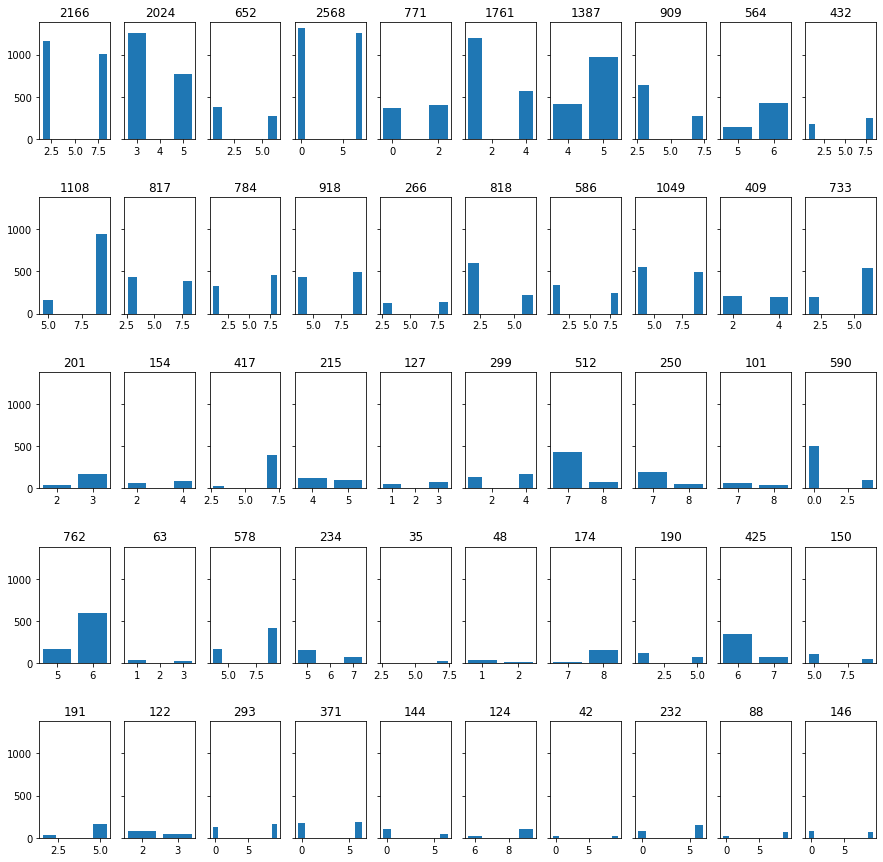

In [11]:
def check(all_client):
    fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(15, 15), sharey=True)
    fig.subplots_adjust(hspace=0.5)

    for i, key in enumerate(all_client.keys()):
        print(key, len(all_client[key]))
        for j in all_client[key].keys():
            print(f'{j}: {len(all_client[key][j])}', end=' ')
        print('\n')

        x = list(all_client[key].keys())
        y = [len(all_client[key][t]) for t in all_client[key].keys()]
        axes[int(i/10), int(i % 10)].bar(x=x, height=y)
        axes[int(i/10), int(i%10)].set_title(sum(y))

check(all_user)

In [12]:
def write_to_file(client_dict: dict):
    all_train_data = {}
    all_test_data = {}

    users = list(client_dict.keys())
    all_train_data['users'] = users
    all_test_data['users'] = users

    num_train_samples = []
    num_test_samples = []
    train_user_data = {}
    test_user_data = {}
    for user in users:
        train_user_data[user] = {}
        test_user_data[user] = {}

        train_user_data[user]['x'] = []
        train_user_data[user]['y'] = []
        test_user_data[user]['x'] = []
        test_user_data[user]['y'] = []

        for key in client_dict[user].keys():
            len_x = len(client_dict[user][key])
            p = int(0.75*len_x)

            train_user_data[user]['x'].extend(client_dict[user][key][:p])
            train_user_data[user]['y'].extend([key]*p)

            test_user_data[user]['x'].extend(client_dict[user][key][p:])
            test_user_data[user]['y'].extend([key]*(len_x - p))

        num_train_samples.append(len(train_user_data[user]['y']))
        num_test_samples.append(len(test_user_data[user]['y']))

    all_train_data['num_samples'] = num_train_samples
    all_test_data['num_samples'] = num_test_samples
    all_train_data['user_data'] = train_user_data
    all_test_data['user_data'] = test_user_data

    with open('./train_json/train.json', 'w') as outfile:
        json.dump(all_train_data, outfile)
    with open('./test_json/test.json', 'w') as outfile:
        json.dump(all_test_data, outfile)

write_to_file(all_user)

AttributeError: 'dict' object has no attribute 'shape'

In [13]:
import torch

/home/ic-lab/miniconda3/envs/torch_v1.9_gpu/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
input_data=torch.rand(5,784)
print(input_data)

tensor([[0.8201, 0.4017, 0.9106,  ..., 0.5116, 0.9945, 0.5335],
        [0.0086, 0.2987, 0.7081,  ..., 0.7986, 0.3394, 0.2376],
        [0.4510, 0.5644, 0.5524,  ..., 0.1244, 0.6492, 0.0100],
        [0.1299, 0.1588, 0.4982,  ..., 0.6942, 0.3128, 0.4840],
        [0.2489, 0.6747, 0.3507,  ..., 0.9320, 0.0315, 0.7213]])


In [17]:
data = input_data.reshape(5,1,-1)

In [18]:
data.shape

torch.Size([5, 1, 784])

In [22]:
import torch.nn as nn

In [24]:
a=np.array([i for i in range(7)]).reshape(1,7,1)
print(a)
conv1 = nn.Conv1d(in_channels=1,out_channels=1,kernel_size=2)
input = torch.Tensor(a) # shape (1,7,1) # in_channels=1
input = input.permute(0,2,1)    # shape (1,1,7) # in_channels=1
print(input)

nn.init.constant_(conv1.weight, 1)	# 将核的元素值初始化为全1
nn.init.constant_(conv1.bias, 0)	# 偏置值为0
print(conv1.weight)

out = conv1(input)
print(out.size())
print(out)
# 结果：
# tensor([[[0., 1., 2., 3., 4., 5., 6.]]])
# Parameter containing:
# tensor([[[1., 1.]]], requires_grad=True)
# torch.Size([1, 1, 6])
# tensor([[[ 1.,  3.,  5.,  7.,  9., 11.]]], grad_fn=<SqueezeBackward1>)

[[[0]
  [1]
  [2]
  [3]
  [4]
  [5]
  [6]]]
tensor([[[0., 1., 2., 3., 4., 5., 6.]]])
Parameter containing:
tensor([[[1., 1.]]], requires_grad=True)
torch.Size([1, 1, 6])
tensor([[[ 1.,  3.,  5.,  7.,  9., 11.]]], grad_fn=<SqueezeBackward1>)


In [25]:
(784//2**4)*64

3136

In [26]:
8929+5423+3768+3355+2148+1284+1013+544+440+1096

28000

In [16]:
# count
# def statistic(all_client):
#     fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(15, 15), sharey=True)
#     fig.subplots_adjust(hspace=0.5)

#     for i, key in enumerate(all_client.keys()):
#         print(key, len(all_client[key]))
#         for j in all_client[key].keys():
#             print(f'{j}: {len(all_client[key][j])}', end=' ')
#         print('\n')

all_client = all_user
samples_num_per_client = [0]*50
print(samples_num_per_client)
for i, key in enumerate(all_client.keys()):
    # print(key, len(all_client[key]))
    for j in all_client[key].keys():
        print(f'{j}: {len(all_client[key][j])}', end=' ')
        samples_num_per_client[i] += len(all_client[key][j])
        
    print('\n')
print(samples_num_per_client)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8: 1005 2: 1161 

5: 769 3: 1255 

1: 383 6: 269 

0: 1315 7: 1253 

2: 401 0: 370 

1: 1191 4: 570 

5: 976 4: 411 

7: 266 3: 643 

5: 138 6: 426 

1: 182 8: 250 

5: 159 9: 949 

3: 434 8: 383 

8: 453 1: 331 

9: 489 4: 429 

8: 138 3: 128 

6: 216 2: 602 

1: 345 8: 241 

9: 492 4: 557 

2: 213 4: 196 

2: 195 6: 538 

2: 34 3: 167 

4: 87 2: 67 

3: 22 7: 395 

4: 121 5: 94 

3: 74 1: 53 

4: 170 1: 129 

7: 436 8: 76 

8: 55 7: 195 

7: 60 8: 41 

0: 497 4: 93 

6: 593 5: 169 

3: 29 1: 34 

4: 166 9: 412 

5: 160 7: 74 

3: 5 7: 30 

2: 15 1: 33 

8: 158 7: 16 

5: 71 1: 119 

7: 75 6: 350 

9: 44 5: 106 

5: 158 2: 33 

3: 43 2: 79 

0: 128 9: 165 

0: 181 6: 190 

0: 103 6: 41 

6: 25 9: 99 

9: 19 0: 23 

6: 152 0: 80 

0: 25 9: 63 

0: 78 9: 68 

[2166, 2024, 652, 2568, 771, 1761, 1387, 909, 564, 432, 1108, 817, 784, 918, 266

In [17]:
min(samples_num_per_client)

35

In [18]:
max(samples_num_per_client)

2568

In [21]:
sum(samples_num_per_client)/len(samples_num_per_client)

560.0

In [22]:
mean = sum(samples_num_per_client)/len(samples_num_per_client)

In [26]:
import math
variance = 0
for i in range(50):
    variance += (samples_num_per_client[i]-mean)**2
std = math.sqrt(variance/50)

In [27]:
std

566.282191137952